<a href="https://colab.research.google.com/github/DCLe-DA/Learning-DL-by-Hand/blob/master/dl01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [3]:
x.requires_grad_(True)
x.grad

In [4]:
y = 2 * torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [5]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [6]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [7]:
x.grad.zero_()
y = 2 * torch.dot(x,x)
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [8]:
#梯度默认会累积，而不是覆盖！
y = x.sum()
y.backward()
x.grad

tensor([ 1.,  5.,  9., 13.])

In [ ]:
!pip list

In [12]:
!pip uninstall d2l

Found existing installation: d2l 0.17.6
Uninstalling d2l-0.17.6:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/d2l-0.17.6.dist-info/*
    /usr/local/lib/python3.8/dist-packages/d2l/*
Proceed (Y/n)? y
  Successfully uninstalled d2l-0.17.6


In [ ]:
! pip list

In [14]:
!pip install d2l==0.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 KB 5.6 MB/s eta 0:00:00


In [1]:
import random
import torch
from d2l import torch as d2l

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [5]:
def synthetic_data(w,b,num_examples):
  X = torch.normal(0,1,(num_examples,len(w)))
  y = torch.matmul(X,w)+b
  y+=torch.normal(0,0.01,y.shape)
  return X,y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,lables = synthetic_data(true_w,true_b,1000)

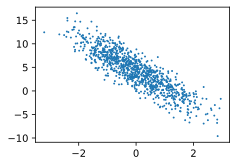

In [6]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),lables.detach().numpy(),1)